# Imports and Custom Functions writen for convenience

## Importing Libraries

In [2]:
from rank_bm25 import BM25Okapi, BM25Plus, BM25L
from newap import average_precision
import json
import numpy as np
import matplotlib.pyplot as plt
import time

## Custom Functions and Location of data folder

In [3]:
loc = "../refining_seriously/"
def namestr(obj, namespace = globals()):
	return [name for name in namespace if namespace[name] is obj][0]
def print_json(query, n = 3, m = 5, k=6):
	n = 3
	print(f"{namestr(query)} ="+"{\n", end="")  # start of the json
	l = sorted(list(query.keys()),
			key=lambda x: int(x[k:]))
	for QID in l[:n]:
		print('\t"'+QID+'":', query[QID][:m], "\b\b, ......],")
	for i in range(2): print("\t...")
	for QID in l[-n:]:
		print('\t"'+QID+'":', query[QID][:m], "\b\b, ......],")
	print("}")  # end of the json

## Importing Data

In [4]:
# "cases.json" has the query and the doc_id of the relevant documents
with open(loc+"cases.json") as f:
    prior_cases = json.load(f)
print_json(prior_cases, k=1)

prior_cases ={
	"C1": ['masud', 'khan', 'v', 'state', 'uttar', ......],
	"C2": ['indian', 'oil', 'corpor', 'v', 'nepc', ......],
	"C3": ['gurpal', 'singh', 'v', 'state', 'punjab', ......],
	...
	...
	"C2912": ['dharangadhara', 'chemic', 'work', 'limit', 'v', ......],
	"C2913": ['central', 'bank', 'india', 'v', 'sethumadhavan', ......],
	"C2914": ['som', 'raj', 'soma', 'v', 'state', ......],
}


In [5]:
# "Query_doc.json" has all the queries (X)
with open(loc+"Query_doc.json") as f:
    query = json.load(f)
print_json(query)

query ={
	"AILA_Q1": ['appel', 'februari', 'appoint', 'offic', 'grade', ......],
	"AILA_Q2": ['appel', 'us', 'examin', 'prime', 'wit', ......],
	"AILA_Q3": ['appeal', 'aris', 'judgment', 'learn', 'singl', ......],
	...
	...
	"AILA_Q48": ['whether', 'sanction', 'requir', 'initi', 'crimin', ......],
	"AILA_Q49": ['appel', 'patwari', 'work', 'villag', 'v1', ......],
	"AILA_Q50": ['peculiar', 'featur', 'appeal', 'special', 'leav', ......],
}


In [6]:
# "answers.json" has the relevant documents (Y)
with open(loc+"answers.json") as f:
    answers = json.load(f)
print_json(answers, 3, 1)

answers ={
	"AILA_Q1": ['C14', ......],
	"AILA_Q2": ['C27', ......],
	"AILA_Q3": ['C1', ......],
	...
	...
	"AILA_Q48": ['C82', ......],
	"AILA_Q49": ['C174', ......],
	"AILA_Q50": ['C27', ......],
}


# Getting Data Ready

In [7]:
# sorted list of all prior cases, corpus_index = ["C1", "C2", ..., "C2914"]
corpus_index = sorted(list(prior_cases.keys()),
                          key=lambda x: int(x[1:]))

# 2D list containing prior cases in order as in corpus_index
tokenized_corpus = [prior_cases[doc_id] for doc_id in corpus_index]

# sorted list of all queries, query_index = ["AILA_Q1", "AILA_Q2", ..., "AILA_Q59"]
query_index = sorted(list(query.keys()),
                     key=lambda x: int(x[6:]))

In [ ]:
## Trial for a single Iteration
# tx0 = time.time()
# bm25 = BM25Okapi(tokenized_corpus, k1 = 0.5)
# print("1 -", time.time()-tx0)
# sum = 0
# for i, Q in enumerate(query_index):
#     tx0 = time.time()
#     doc_scores = bm25.get_scores(query[Q])
#     sum += average_precision(doc_scores, answers[Q])
#     print("\t", i, "-", time.time()-tx0)
#     # print(Q)
# MeanAP = sum/len(query_index)
# MeanAP*100

# Getting Scores (BM25Okapi)
### Literatue Values:
 - k1 should not be more than 3 or 4. **(default = 1.2)**
 - 0 < b < 1 **(default = 0.75)**
 - epsilon can take larger values **(default = 0.25)**

## With Changing b (0, 1, 0.01)

In [41]:
X = {x:None for x in np.arange(0, 1, 0.025)}
t00 = time.time()    ######
for i, var in enumerate(X):
    i+=1
    t0 = time.time()    ######


    print("epsilon =", var, end=" ")
    bm25 = BM25Okapi(tokenized_corpus, k1=3.9, b=var, epsilon=0.01)
    sum = 0
    for Q in query_index:
        doc_scores = bm25.get_scores(query[Q])
        sum += average_precision(doc_scores, answers[Q])
    MeanAP = sum/len(query_index)
    X[var] = MeanAP
    print("-> MeanAP =", MeanAP)
    
    
    # show results 
    t1 = time.time() ######
    print(f"took {(t1-t0)} seconds") ######
    print(f"average time taken per file = {((t1-t00)/i)} seconds") ######
    print(f"percentage done = {(i/len(X)*100)}%") ######
    print(f"estimated time remaining = {((t1-t00)*(len(X)-i)/i)} sec = {((t1-t00)*(len(X)-i)/(60*i))} min") ######
    print(f"total elapsed time = {(t1-t00)} seconds\n") ######

epsilon = 0.0 -> MeanAP = 0.14326226970166564
took 35.42499399185181 seconds
average time taken per file = 35.425994873046875 seconds
percentage done = 2.5%
estimated time remaining = 1381.6138000488281 sec = 23.026896667480468 min
total elapsed time = 35.425994873046875 seconds

epsilon = 0.025 -> MeanAP = 0.14911048644303995
took 35.77334904670715 seconds
average time taken per file = 35.600173592567444 seconds
percentage done = 5.0%
estimated time remaining = 1352.8065965175629 sec = 22.546776608626047 min
total elapsed time = 71.20034718513489 seconds

epsilon = 0.05 -> MeanAP = 0.1550011325466424
took 34.518561601638794 seconds
average time taken per file = 35.239636262257896 seconds
percentage done = 7.5%
estimated time remaining = 1303.866541703542 sec = 21.731109028392368 min
total elapsed time = 105.71890878677368 seconds

epsilon = 0.07500000000000001 -> MeanAP = 0.16288993117656186
took 34.98101830482483 seconds
average time taken per file = 35.175231635570526 seconds
percen

In [42]:
a = list(X.keys())
m = max(X.values())
print(f"best BM25(b = {a[list(X.values()).index(m)]}) = {m*100}%")

best BM25(b = 0.7250000000000001) = 22.429298768898786%


Text(0, 0.5, 'MAP')

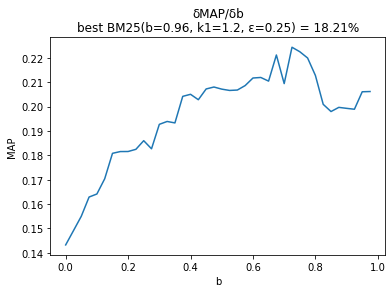

In [43]:
plt.plot(X.keys(), X.values())
plt.title("δMAP/δb\nbest BM25(b=0.96, k1=1.2, ε=0.25) = 18.21%")
plt.xlabel("b")
plt.ylabel("MAP")

## With Changing k1 (0.1, 5, 0.1)

In [44]:
X = {x:None for x in np.arange(0.1, 5, 0.5)}
t00 = time.time()    ######
for i, var in enumerate(X):
    i+=1
    t0 = time.time()    ######


    print("epsilon =", var, end=" ")
    bm25 = BM25Okapi(tokenized_corpus, k1=var, b=0.725, epsilon=0.01)
    sum = 0
    for Q in query_index:
        doc_scores = bm25.get_scores(query[Q])
        sum += average_precision(doc_scores, answers[Q])
    MeanAP = sum/len(query_index)
    X[var] = MeanAP
    print("-> MeanAP =", MeanAP)
    
    
    # show results 
    t1 = time.time() ######
    print(f"took {(t1-t0)} seconds") ######
    print(f"average time taken per file = {((t1-t00)/i)} seconds") ######
    print(f"percentage done = {(i/len(X)*100)}%") ######
    print(f"estimated time remaining = {((t1-t00)*(len(X)-i)/i)} sec = {((t1-t00)*(len(X)-i)/(60*i))} min") ######
    print(f"total elapsed time = {(t1-t00)} seconds\n") ######

epsilon = 0.1 -> MeanAP = 0.14692899667164477
took 28.007737636566162 seconds
average time taken per file = 28.007737636566162 seconds
percentage done = 10.0%
estimated time remaining = 252.06963872909546 sec = 4.201160645484924 min
total elapsed time = 28.007737636566162 seconds

epsilon = 0.6 -> MeanAP = 0.17732931622112677
took 28.74072027206421 seconds
average time taken per file = 28.374228954315186 seconds
percentage done = 20.0%
estimated time remaining = 226.99383163452148 sec = 3.783230527242025 min
total elapsed time = 56.74845790863037 seconds

epsilon = 1.1 -> MeanAP = 0.1889485133556634
took 26.652719259262085 seconds
average time taken per file = 27.800392389297485 seconds
percentage done = 30.0%
estimated time remaining = 194.6027467250824 sec = 3.2433791120847064 min
total elapsed time = 83.40117716789246 seconds

epsilon = 1.6 -> MeanAP = 0.18576004158990642
took 25.963233709335327 seconds
average time taken per file = 27.341102719306946 seconds
percentage done = 40.0%

In [45]:
a = list(X.keys())
m = max(X.values())
print(f"best BM25(k1 = {a[list(X.values()).index(m)]}) = {m*100}%")

best BM25(k1 = 3.6) = 22.109345857960562%


Text(0, 0.5, 'MAP')

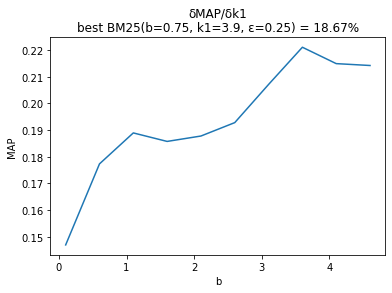

In [46]:
plt.plot(X.keys(), X.values())
plt.title(f"δMAP/δk1\nbest BM25(b=0.75, k1=3.9, ε=0.25) = 18.67%")
plt.xlabel("b")
plt.ylabel("MAP")

## With Changing epsilon (0.1, 2, 0.1)

In [38]:
X = {x:None for x in np.arange(0, 1, 0.1)}
t00 = time.time()    ######
for i, var in enumerate(X):
    i+=1
    t0 = time.time()    ######


    print("epsilon =", var, end=" ")
    bm25 = BM25Okapi(tokenized_corpus, k1=3.9, b=0.96, epsilon=var)
    sum = 0
    for Q in query_index:
        doc_scores = bm25.get_scores(query[Q])
        sum += average_precision(doc_scores, answers[Q])
    MeanAP = sum/len(query_index)
    X[var] = MeanAP
    print("-> MeanAP =", MeanAP)
    
    
    # show results 
    t1 = time.time() ######
    print(f"took {(t1-t0)} seconds") ######
    print(f"average time taken per file = {((t1-t00)/i)} seconds") ######
    print(f"percentage done = {(i/len(X)*100)}%") ######
    print(f"estimated time remaining = {((t1-t00)*(len(X)-i)/i)} sec = {((t1-t00)*(len(X)-i)/(60*i))} min") ######
    print(f"total elapsed time = {(t1-t00)} seconds\n") ######

epsilon = 0.0 -> MeanAP = 0.2053936219824716
took 29.125900983810425 seconds
average time taken per file = 29.125900983810425 seconds
percentage done = 10.0%
estimated time remaining = 262.1331088542938 sec = 4.3688851475715635 min
total elapsed time = 29.125900983810425 seconds

epsilon = 0.1 -> MeanAP = 0.1946189779705794
took 28.287304878234863 seconds
average time taken per file = 28.706602931022644 seconds
percentage done = 20.0%
estimated time remaining = 229.65282344818115 sec = 3.827547057469686 min
total elapsed time = 57.41320586204529 seconds

epsilon = 0.2 -> MeanAP = 0.18928497048759294
took 32.02809810638428 seconds
average time taken per file = 29.81376798947652 seconds
percentage done = 30.0%
estimated time remaining = 208.69637592633566 sec = 3.478272932105594 min
total elapsed time = 89.44130396842957 seconds

epsilon = 0.30000000000000004 -> MeanAP = 0.1809059061128426
took 35.050408124923706 seconds
average time taken per file = 31.122928023338318 seconds
percentage

In [39]:
a = list(X.keys())
m = max(X.values())
highest = round(a[list(X.values()).index(m)], 2)
print(f"best BM25(epsilon = {highest}) = {m*100}%")

best BM25(epsilon = 0.0) = 20.53936219824716%


Text(0, 0.5, 'MAP')

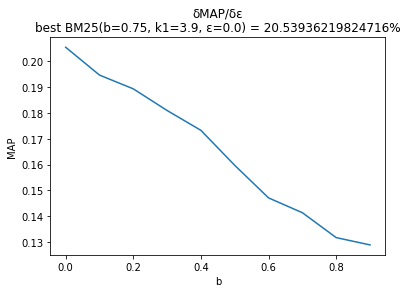

In [40]:
plt.plot(X.keys(), X.values())
plt.title(f"δMAP/δε\nbest BM25(b=0.75, k1=3.9, ε={highest}) = {m*100}%")
plt.xlabel("b")
plt.ylabel("MAP")

In [31]:
X = {a: b for a, b in X.items() if b}